## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2024-25 учебный год

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл надо будет сдать в anytask.

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены авторами. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

При работе с табличными данными используйте функционал [style](https://pandas.pydata.org/docs/user_guide/style.html#Builtin-Styles), чтобы визуально выделять необходимые элементы.

В этом задании будут оцениваться ваши развернутые комментарии, размышления и выводы (по построенным графикам): не скупитесь на них, но следите, чтобы выводы не были поверхностными и очевидными.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее). То есть каждое окно покрывает 2.56 секунды данных (два шага человека при ходьбе, учитывая медленную походку пожилых людей).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано в [самой статье](https://www.esann.org/sites/default/files/proceedings/legacy/es2013-84.pdf))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [7]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [8]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [9]:
train = train[cols_subset]
test = test[cols_subset]
# train.to_csv('cut_train.csv')
# test.to_csv('cut_test.csv')

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [10]:
print(
f'''test: 
Пропуски в test: {test.isnull().sum().sum()} 
Одинаковые значения есть в столбцах: {test.agg(lambda x: x.nunique() != x.shape[0])[lambda x: x].index.tolist()} 
Одинаковых строк: {test.duplicated().sum()}
{30 * '-'}'''
)

print(
f'''train: 
Пропуски в train: {train.isnull().sum().sum()} 
Одинаковые значения есть в столбцах: {train.agg(lambda x: x.nunique() != x.shape[0])[lambda x: x].index.tolist()} 
Одинаковых строк: {train.duplicated().sum()}
{30 * '-'}'''
)

test: 
Пропуски в test: 0 
Одинаковые значения есть в столбцах: ['tBodyGyroJerk-mad()-X', 'tGravityAcc-min()-X', 'tBodyAcc-max()-X', 'fBodyAcc-bandsEnergy()-1,8.2', 'subject', 'Activity'] 
Одинаковых строк: 0
------------------------------
train: 
Пропуски в train: 0 
Одинаковые значения есть в столбцах: ['tBodyAccMag-mean()', 'tBodyGyroJerk-mad()-X', 'tGravityAcc-min()-X', 'tBodyAcc-max()-X', 'fBodyAcc-bandsEnergy()-1,8.2', 'fBodyAcc-skewness()-X', 'subject', 'Activity'] 
Одинаковых строк: 0
------------------------------


#### Ответ
Пропусков в данных нет, дупликатов(одинаковых строк) тоже нет. Встречаются одинаковые данные в отдельно взятых столбцах, это могло произойти из-за: 
* Наложения окон, особенно для max и min  
* Стабильности в действии, если человек сидит или стоит  
* Также не стоит исключать вероятность совпадения показателей у хотя бы двоих из тридцати людей.  

### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [11]:
stat = train.drop('subject', axis=1).describe().merge(test.drop('subject', axis=1).describe(), how='outer', left_index=True, right_index=True, suffixes=['(train)', '(test)'])
stat[
    ['tBodyAccMag-mean()(train)', 'tBodyAccMag-mean()(test)', 
    'tBodyGyroJerk-mad()-X(train)', 'tBodyGyroJerk-mad()-X(test)', 
    'tGravityAcc-min()-X(train)', 'tGravityAcc-min()-X(test)', 
    'tBodyAcc-max()-X(train)', 'tBodyAcc-max()-X(test)', 
    'fBodyAcc-bandsEnergy()-1,8.2(train)', 'fBodyAcc-bandsEnergy()-1,8.2(test)', 
    'angle(X,gravityMean)(train)', 'angle(X,gravityMean)(test)', 
    'angle(Y,gravityMean)(train)', 'angle(Y,gravityMean)(test)', 
    'angle(Z,gravityMean)(train)', 'angle(Z,gravityMean)(test)', 
    'fBodyAcc-skewness()-X(train)', 'fBodyAcc-skewness()-X(test)']
]

,tBodyAccMag-mean()(train),tBodyAccMag-mean()(test),tBodyGyroJerk-mad()-X(train),tBodyGyroJerk-mad()-X(test),tGravityAcc-min()-X(train),tGravityAcc-min()-X(test),tBodyAcc-max()-X(train),tBodyAcc-max()-X(test),"fBodyAcc-bandsEnergy()-1,8.2(train)","fBodyAcc-bandsEnergy()-1,8.2(test)","angle(X,gravityMean)(train)","angle(X,gravityMean)(test)","angle(Y,gravityMean)(train)","angle(Y,gravityMean)(test)","angle(Z,gravityMean)(train)","angle(Z,gravityMean)(test)",fBodyAcc-skewness()-X(train),fBodyAcc-skewness()-X(test)
25%,-0.983282,-0.978433,-0.991595,-0.989078,0.804270,0.836787,-0.936219,-0.934447,-0.999480,-0.999330,-0.812065,-0.829722,-0.017885,0.022140,-0.143414,-0.098485,-0.486841,-0.497070
50%,-0.883371,-0.861830,-0.950268,-0.914698,0.926693,0.934930,-0.881637,-0.852659,-0.986582,-0.979336,-0.709417,-0.729648,0.182071,0.181563,0.003181,-0.010671,-0.163271,-0.202050
75%,-0.106892,-0.149596,-0.474625,-0.486423,0.965095,0.970871,-0.017129,-0.009965,-0.764508,-0.799113,-0.509079,-0.545939,0.248353,0.260252,0.107659,0.092373,0.155112,0.140254
count,7352.000000,2947.000000,7352.000000,2947.000000,7352.000000,2947.000000,7352.000000,2947.000000,7352.000000,2947.000000,7352.000000,2947.000000,7352.000000,2947.000000,7352.000000,2947.000000,7352.000000,2947.000000
max,1.000000,0.479547,1.000000,0.117606,1.000000,0.996148,1.000000,0.786436,1.000000,0.048730,1.000000,0.833180,0.478157,1.000000,1.000000,0.973113,1.000000,0.960367
mean,-0.543884,-0.559043,-0.727735,-0.735661,0.678505,0.696878,-0.468604,-0.462063,-0.847963,-0.880361,-0.489547,-0.513923,0.058593,0.074886,-0.056515,-0.048720,-0.128562,-0.154042
min,-1.000000,-0.998936,-0.999889,-1.000000,-1.000000,-0.756774,-1.000000,-0.952357,-1.000000,-0.999989,-1.000000,-0.984195,-1.000000,-0.913704,-1.000000,-0.949228,-0.931208,-1.000000
std,0.477653,0.439539,0.315832,0.282074,0.508656,0.502873,0.544547,0.523916,0.233633,0.160496,0.511807,0.509205,0.297480,0.324300,0.279122,0.241467,0.403686,0.392203


#### Ответ
В целом данные в `train` и `test`статистически схожи, но если посмотореть на max, то можно заметить, что для `tBodyAccMag-mean()`, `tBodyGyroJerk-mad()-X`, `fBodyAcc-bandsEnergy()-1,8.2` в `train` максимальные значения гораздо выше чем в `test`, обратная ситуация наблюдается в `angle(Y,gravityMean)`. Также можно заметить ассиметричность в распределении некторых признаков, например в `tBodyAccMag-mean()`

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [12]:
train_act = train.groupby('Activity').count()['subject']
test_act = test.groupby('Activity').count()['subject']

train_act.name = 'train'
test_act.name = 'test'

act = pd.concat([train_act, test_act], axis=1)
act

,train,test
Activity,,
LAYING,1407,537
SITTING,1286,491
STANDING,1374,532
WALKING,1226,496
WALKING_DOWNSTAIRS,986,420
WALKING_UPSTAIRS,1073,471


In [13]:
print(f'Разница между самой большой и маленькой в train: {round((act['train'].max() - act['train'].min()) / act['train'].max() * 100.0)}%')
print(f'Разница между самой большой и маленькой в test: {round((act['test'].max() - act['test'].min()) / act['test'].max() * 100.0)}%')

Разница между самой большой и маленькой в train: 30%
Разница между самой большой и маленькой в test: 22%


#### Ответ: данные в train и test сбалансированы

### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [14]:
train['act_code'], un_vals = pd.factorize(train['Activity'])
train.corr(numeric_only=True)

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject,act_code
tBodyAccMag-mean(),1.000000,0.899080,0.369962,0.959827,0.697832,-0.370849,0.495561,0.426283,0.379796,-0.073652,0.843173
tBodyGyroJerk-mad()-X,0.899080,1.000000,0.380118,0.879900,0.507939,-0.382246,0.478567,0.380967,0.266002,-0.110321,0.717213
tGravityAcc-min()-X,0.369962,0.380118,1.000000,0.380404,0.239088,-0.988663,0.797116,0.667415,-0.261676,-0.042371,0.066679
tBodyAcc-max()-X,0.959827,0.879900,0.380404,1.000000,0.613383,-0.384192,0.480229,0.405023,0.335708,-0.055633,0.823796
"fBodyAcc-bandsEnergy()-1,8.2",0.697832,0.507939,0.239088,0.613383,1.000000,-0.213318,0.363170,0.423927,0.260316,-0.037000,0.666081
"angle(X,gravityMean)",-0.370849,-0.382246,-0.988663,-0.384192,-0.213318,1.000000,-0.783848,-0.643655,0.265523,0.026137,-0.050553
"angle(Y,gravityMean)",0.495561,0.478567,0.797116,0.480229,0.363170,-0.783848,1.000000,0.594885,-0.046213,-0.009829,0.234964
"angle(Z,gravityMean)",0.426283,0.380967,0.667415,0.405023,0.423927,-0.643655,0.594885,1.000000,-0.183815,-0.098712,0.219376
fBodyAcc-skewness()-X,0.379796,0.266002,-0.261676,0.335708,0.260316,0.265523,-0.046213,-0.183815,1.000000,0.019742,0.496699
subject,-0.073652,-0.110321,-0.042371,-0.055633,-0.037000,0.026137,-0.009829,-0.098712,0.019742,1.000000,-0.043513


#### Ответ: 
Можно заметить достаточно высокий уровень корреляции между физическими признаками, так как они характеризуют показатели физической активности. Корреляция таргета высока **почти** со всеми показателями, это означает, что признаки важны. Признаки `tBodyAcc-max()-X` и `tBodyAccMag-mean()` показывают почти полную зависимость - _0.95_. Аналогично с признакми `tGravityAcc-min()-X` и `angle(X,gravityMean)` - _-0.98_, возможно, некоторые из них избыточны. Признаки `tBodyAccMag-mean()`, `tBodyAcc-max()-X`, `tBodyGyroJerk-mad()-X` и `fBodyAcc-bandsEnergy()-1,8.2` имеют самую высокую корреляцию с таргетом.

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

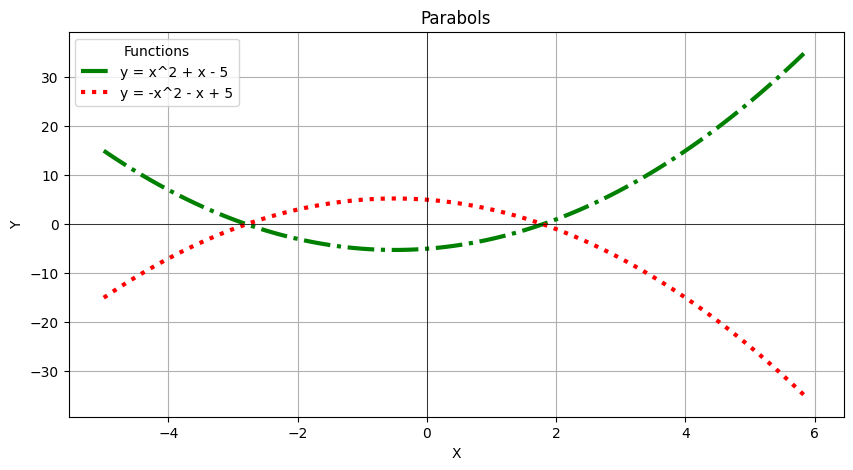

In [15]:
x = np.arange(-5, 6, 0.1)
par1 = x ** 2 + x - 5
par2 = -x ** 2 - x + 5

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, par1, linestyle='-.', color='g', label='y = x^2 + x - 5', linewidth=3)
ax.plot(x, par2, linestyle=':', color='r', label='y = -x^2 - x + 5', linewidth=3)

ax.axhline(0, color='black', linewidth=.5)  
ax.axvline(0, color='black', linewidth=.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.grid()
ax.legend(title='Functions')
plt.title('Parabols')

plt.show()

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

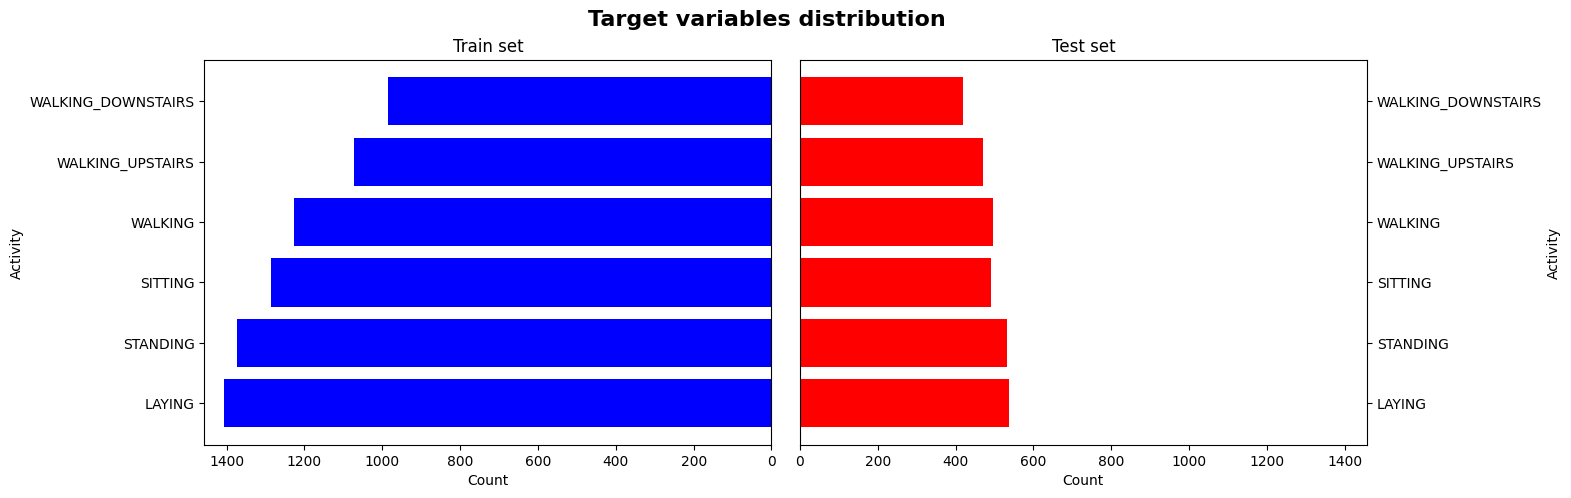

In [16]:
act.sort_values(by='train', inplace=True, ascending=False)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
max_count = max(act['train'].max(), act['test'].max()) + 50

axes[0].barh(act.index, act['train'], color='blue')
axes[0].set_xlim(0, max_count)
axes[0].invert_xaxis()
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Activity')
axes[0].set_title('Train set')

axes[1].barh(act.index, act['test'], color='red')
axes[1].set_xlim(0, max_count)
axes[1].yaxis.tick_right()
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Activity')
axes[1].yaxis.set_label_position('right')
axes[1].set_title('Test set')

fig.subplots_adjust(wspace=0.05)
fig.suptitle('Target variables distribution', fontsize=16, fontweight='bold')
plt.show()


Правда на таких графиках проще проверять баланс классов таргета?)

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

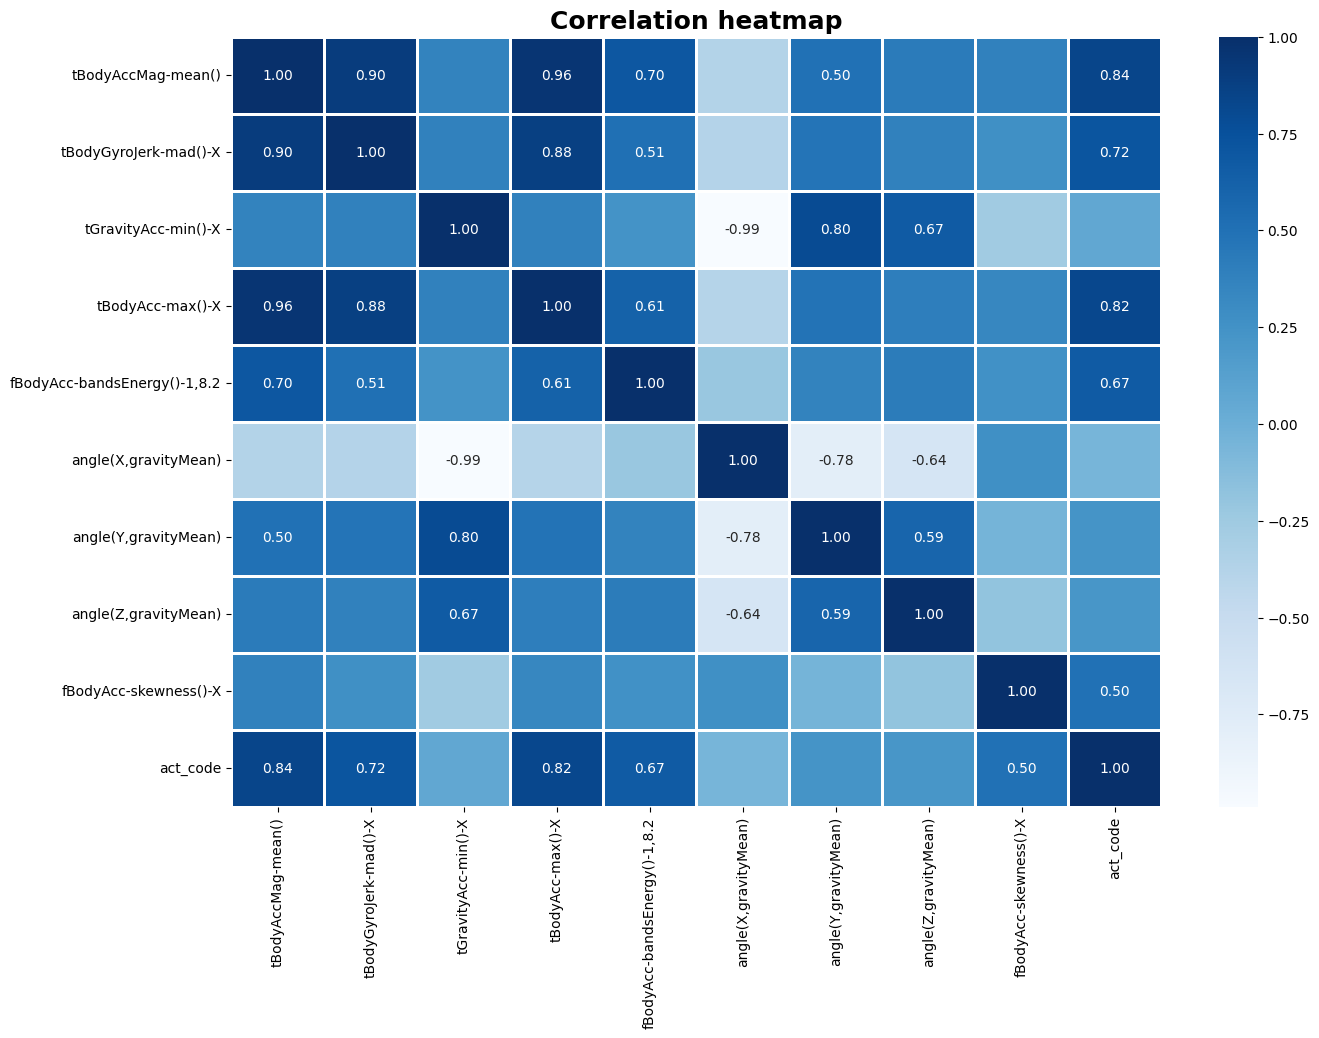

In [17]:
plt.figure(figsize=(15, 10))
plt.title('Correlation heatmap', fontweight='bold', fontsize=18)

ax = sns.heatmap(train.drop('subject', axis=1).corr(numeric_only=True), annot=True, fmt='.2f', cmap='Blues', linewidths=2)

for t in ax.texts: 
    t.set_text(t.get_text() if abs(float(t.get_text())) >= 0.5 else "")
     
plt.show()

#### Ответ:
Из рассмотрения корреляций стоит исключить признак - `subject`. Данный признак просто обозначает номер человека, на котором производилось измерение. Данный признак не обозначает никакой зависимости между людьми, будто уровень физической подготовки, возраст, пол и др.

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

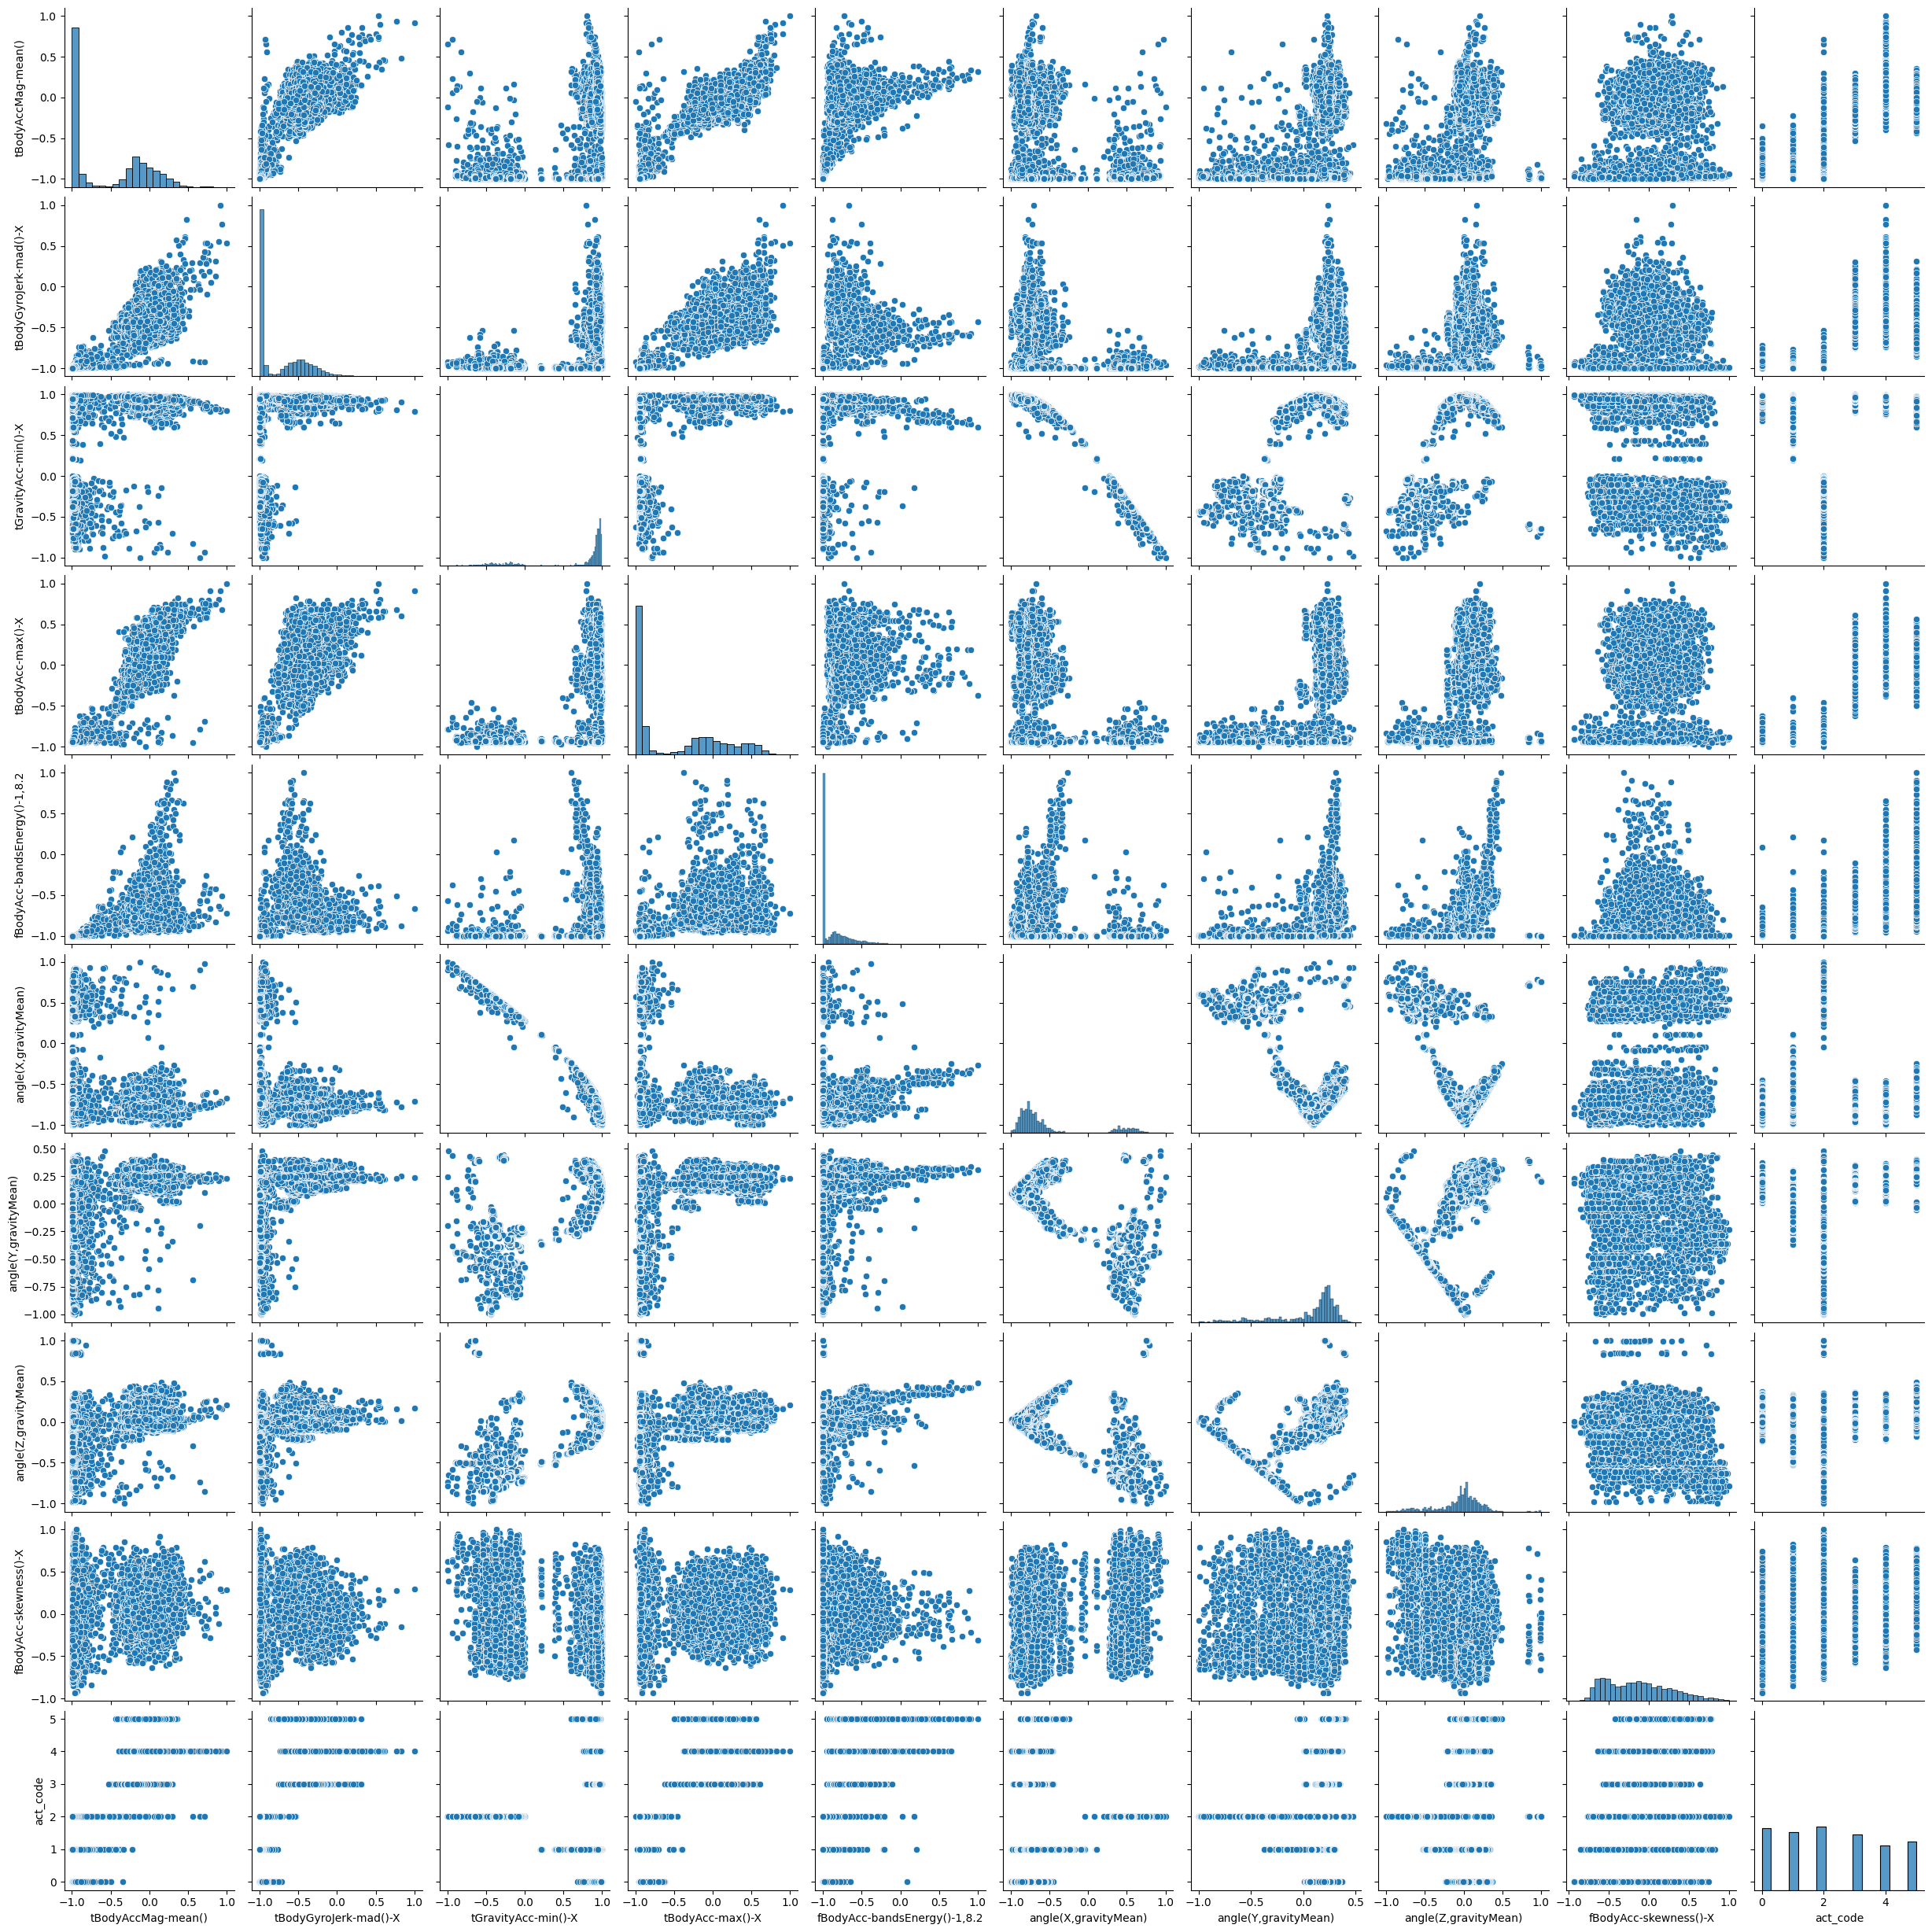

In [18]:
sns.pairplot(train.drop('subject', axis=1))
plt.show()

# Неудобно

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

In [ ]:
import matplotlib.animation as animation # с анимацией красиво получится
from IPython.display import HTML

# Заполним тип в соответствии с таргетом
train['True type of activity'] = np.where(train['Activity'].isin(['SITTING', 'STANDING', 'LAYING']), 'Static', 'Dynamic')

fig, ax = plt.subplots(figsize=(10, 6))

for activity in train['Activity'].unique():
    sns.kdeplot(train[train['Activity'] == activity]['tBodyAccMag-mean()'], label=activity, ax=ax)

ax.set_xlabel('Body Acceleration')
ax.set_title('Mean body acceleration for activities', fontweight='bold', fontsize=16)
ax.legend(title='Activity')

# Линии для threshold и best threshold
threshold_line = ax.axvline(x=-1, linestyle='--', color='black', label='Threshold', alpha=0.3)
best_threshold_line = ax.axvline(x=-1, linestyle='-', color='black', label='Best Threshold')
ax.legend()

best_accuracy = 0
best_threshold = -1

def calc_accuracy(threshold):
    train['Type of activity'] = np.where(train['tBodyAccMag-mean()'] < threshold, 'Static', 'Dynamic')
    right_ans = train[train['Type of activity'] == train['True type of activity']].shape[0]
    all_ans = train.shape[0]
    return right_ans / all_ans

def update(frame):
    global best_accuracy, best_threshold
    current_threshold = np.linspace(-1, 1, 100)[frame]  
    threshold_line.set_xdata([current_threshold])
    
    current_accuracy = calc_accuracy(current_threshold)
    
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_threshold = current_threshold
        best_threshold_line.set_xdata([best_threshold])
    
    ax.set_title(f'Mean body acceleration\nThreshold: {current_threshold:.2f}, 'f'Best Threshold: {best_threshold:.2f}, Best Accuracy: {best_accuracy:.2f}', fontweight='bold', fontsize=16)
    
    return threshold_line, best_threshold_line

ani = animation.FuncAnimation(fig, update, frames=100, interval=50, blit=False)


HTML(ani.to_jshtml())

In [ ]:
# Разделим активности на две группы исходя из линии
train['Type of activity'] = np.where(train['tBodyAccMag-mean()'] < round(best_threshold, 2), 'Static', 'Dynamic')
wrong_ans = train[train['Type of activity'] != train['True type of activity']].shape[0] # Неправильные
right_ans = train[train['Type of activity'] == train['True type of activity']].shape[0] # Правильные
all_ans = train.shape[0]

print(f'Всего: {all_ans}, Правильные: {right_ans}, Неправильные: {wrong_ans}')
print(f'Доля верных ответов (accuracy): {right_ans / all_ans}')

In [ ]:
# Посмотрим, что происходит чаще: Static, при верном ответе Dynamic? или наоборот?
print(f'Неправильно определили Static: {train[(train['True type of activity'] == 'Static') & (train['Type of activity'] == 'Dynamic')].shape[0]}')
print(f'Неправильно определили Dynamic: {train[(train['True type of activity'] == 'Dynamic') & (train['Type of activity'] == 'Static')].shape[0]}')

#### Вывод:
Доля правильных ответов для линии - 0.99. Среднее ускорение тела напрямую харектиризует статично действие или динамично. В 53 из 55 случаев ошибки, активность была статичной, но по линии - динамичной. Это может быть связано с тем, что человек мог двигаться очень короткий промежуток времени.

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

In [ ]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)
for activity in train['Activity'].unique():
    sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train[train['Activity'] == activity], ax=ax)
plt.xticks(rotation=30)
plt.ylabel('Angle')
plt.title('Angle between X axis and gravitational acceleration', fontweight='bold', fontsize=16)
plt.show()

#### Вывод
Данные на графике отражают углы между положением человека и ускорением гравитации. Положение человека лежа значительно выделяется, так как во всех остальных активностях человек расположен относительно вертикально (может немного наклонятся при подъемах и спусках на лестницах и ходьбе). Выбросы при сидении могут быть связаны с разным положением, например из-за наклона спинки стула или кресла. Также среди динамических активностей можно выделить `WALKING_UPSTAIRS` 

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 1, 1)
sns.violinplot(x='Activity', y='tBodyAcc-max()-X', data=train, ax=ax, inner='quartile', orient='x', split=True, hue='Activity')
plt.ylabel('Maximal acceleration')
plt.title('Maximal body acceleration over activities', fontweight='bold', fontsize=16) 
plt.grid()
plt.show()

#### Вывод
Среди всех активностей больше всего выделяется спуск по лестнице, у него самое большое ускорение. Это может быть связано с тем, что человек достаточно резко разгоняется при начале спуска, и резко замедляется в конце, подходя к следующему пролету.

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (`boxenplot` - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

In [ ]:
train_dyn = train[train['True type of activity'] == 'Dynamic']
train_stat = train[train['True type of activity'] == 'Static']

fig = plt.figure(figsize=(15, 5))
grid_spec = fig.add_gridspec(1, 2, width_ratios=[2, 1])
ax = fig.add_subplot(grid_spec[0])

sns.boxenplot(x='Activity', y='fBodyAcc-bandsEnergy()-1,8.2', data=train_dyn, ax=ax)
ax.set_title('Dynamic activities')
ax.set_ylabel('Frequency energy')

ax = fig.add_subplot(grid_spec[1])
for activity in train_stat['Activity'].unique():
    sns.histplot(x='angle(Y,gravityMean)', data=train_stat[train_stat['Activity'] == activity], ax=ax, alpha=.5, label=activity, binwidth=.021)
ax.set_title('Static activities')
ax.set_xlabel('Angle')
ax.legend(title='Activity')

fig.suptitle('Angle and Energy for activities', fontweight='bold', fontsize=16)
plt.show()

#### Вывод
Среди статических активностей можно выделить положение стоя - чаще всего угол между осью Y и средним направлением гравитации в пределах 0.15 - 0.3, в положении лежа это значение чаще всего составляет -1 - -0.3. Среди динамических активностей по энергии ускорения тела, выделяется подъем по лестнице на фоне простой ходьбы и немного на фоне спуска по лестнице.

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

In [ ]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 2, 1)
sns.boxplot(x='Activity', y='fBodyAcc-skewness()-X', data=train_stat, ax=ax, palette='bright')
ax.set_ylabel('Skewness')
ax.set_title('Skewness of body acceleration over activities')

ax = fig.add_subplot(1, 2, 2)
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data=train_stat[train_stat['fBodyAcc-skewness()-X'] < -0.376], ax=ax, palette='bright')
ax.set_ylabel('Angle')
ax.set_title('Angle between Y-axis and gravity acceleration over activities')

fig.suptitle('Acceleration and Angle over static activities', fontweight='bold', fontsize=16)

plt.show()

#### Ответ:
Разделение по `fBodyAcc-skewness()-X` затруднено из-за перекрытия и выбросов. По признаку `angle(Y,gravityMean)` выделятся **_LAYNG_** на фоне остальных статических активностей. Также можно с небольшой точностью отделить `STANDING` и `SITTING` (правый график).

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

In [ ]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 2, 1)
sns.violinplot(x='Activity', y='tBodyAcc-max()-X', data=train_dyn, palette="mako", ax=ax)
ax.set_title('Maximal body acceleration over activities')
ax.set_ylabel('Acceleration')

ax = fig.add_subplot(1, 2, 2)
sns.swarmplot(x='Activity', y='tGravityAcc-min()-X', data=train_dyn[train_dyn['tBodyAcc-max()-X'] < 0.157], ax=ax, palette='bright')
ax.set_ylabel('')
ax.set_title('Minimal gravity acceleration over activities')

fig.suptitle('Body and gravity acceleration over dinamic activities', fontweight='bold', fontsize=16)
plt.legend()
fig.subplots_adjust(wspace=0.1)
plt.show()

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [ ]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity', 'True type of activity', 'Type of activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity', 'True type of activity', 'Type of activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [ ]:
import plotly.express as px
px.scatter(data_frame=df_2_comp, x='x', y='y', color='Activity', title='2D scatter')

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [ ]:
px.scatter_3d(data_frame=df_3_comp, x='x', y='y', z='z', color='Activity', title='3D scatter')

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шпаргалка с готовыми идеями для такой задачи](https://rutube.ru/video/f884aa6ed5f94120b7304506042fe5bb/)

In [ ]:
def predict(df: pd.DataFrame, thresholds) -> pd.Series:
    df = df.copy()  # в финальной версии не меняем оригинальный датафрейм

    # Точнее всего проще определить LAYING
    df['predict'] = np.where(df['angle(X,gravityMean)'] > thresholds[0], 'LAYING', 'NOT')
    
    # WALKING_DOWNSTAIRS, если не LAYING
    df['predict'] = np.where((df['tBodyAcc-max()-X'] > thresholds[1]) & (df['predict'] != 'LAYING'), 'WALKING_DOWNSTAIRS', df['predict'])
    
    # STATIC, если не LAYING и не WALKING_DOWNSTAIRS
    df['predict'] = np.where((df['tBodyAccMag-mean()'] < -0.49) & (df['predict'].isin(['NOT', 'STATIC'])), 'STATIC', df['predict'])
    
    # STANDING, если STATIC и angle(Y,gravityMean) больше порога
    df['predict'] = np.where((df['predict'] == 'STATIC') & (df['angle(Y,gravityMean)'] > thresholds[2]), 'STANDING', df['predict'])
    
    # SITTING, если не LAYING, не STANDING, angle(Y,gravityMean) <= порога и fBodyAcc-skewness()-X больше порога
    df['predict'] = np.where((df['predict'].isin(['NOT', 'STATIC'])) & (df['angle(Y,gravityMean)'] <= thresholds[2]) & (df['fBodyAcc-skewness()-X'] > thresholds[3]), 'SITTING', df['predict'])
    
    # Выявленные STATIC переклассифицируем в SITTING
    df['predict'] = np.where((df['predict'] == 'STATIC'), 'SITTING', df['predict'])
    
    # WALKING_UPSTAIRS, если fBodyAcc-bandsEnergy()-1,8.2 больше порога и angle(X,gravityMean) больше порога
    df['predict'] = np.where((df['fBodyAcc-bandsEnergy()-1,8.2'] > thresholds[5]) & (df['angle(X,gravityMean)'] > thresholds[4]), 'WALKING_UPSTAIRS', df['predict'])
    
    # WALKING, если 'NOT' и условия для WALKING_UPSTAIRS не выполняются
    df['predict'] = np.where((df['predict'] == 'NOT') & (df['angle(X,gravityMean)'] <= thresholds[4]) & (df['fBodyAcc-bandsEnergy()-1,8.2'] <= thresholds[5]), 'WALKING', df['predict'])
    
    # Оставшиеся переклассифицируем в WALKING_UPSTAIRS
    df['predict'] = np.where(df['predict'] == 'NOT', 'WALKING_UPSTAIRS', df['predict'])
    
    return df['predict']

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()


thresholds = [np.float64(0.15), np.float64(0.23), np.float64(0.11), np.float64(-0.81), np.float64(-0.61), np.float64(-0.58)] # пороги
                        
preds_train = predict(train, thresholds)
preds_test = predict(test, thresholds)

train_acc = accuracy_score(train["Activity"], preds_train)
test_acc = accuracy_score(test["Activity"], preds_test)


print(f'Accuracy на обучающей выборке: {train_acc:.2f}')
print(f'Accuracy на тестовой выборке: {test_acc:.2f}')

### Просто ради интереса

In [ ]:
# Очистим train и test от лишних столбцов
train.drop(['True type of activity', 'Type of activity', 'subject', 'act_code'], axis=1, inplace=True)
test.drop(['subject'], axis=1, inplace=True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def predict(df: pd.DataFrame):
    return knn.predict(df.drop(['Activity'], axis=1))

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

knn = KNeighborsClassifier(n_neighbors=7) # количество соседей взял на рандом
knn.fit(train.drop(['Activity'], axis=1), train['Activity'])
train_preds = predict(train)
test_preds = predict(test)

print(f'Accuracy на обучающей выборке: {accuracy_score(train['Activity'], train_preds):.2f}')
print(f'Accuracy на тестовой выборке: {accuracy_score(test['Activity'], test_preds):.2f}')

__Место для мема и/или фидбэка__

Считаю, что в 16 задании очень дорогой балл